<a href="https://colab.research.google.com/github/marcosverabower/1er-Final-IA/blob/main/SarimaxTempAsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Biblotecas Utilizadas**

Integrantes:

Mauricio Ariel Galeano Garcia 4517250

Santiago Daniel Schaerer Meza 5811170

Marcos Lorenzo Vera Bower 4991625

In [ ]:
global_vars = globals()

# Delete all global variables
for var in list(global_vars.keys()):
    del global_vars[var]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm

import itertools
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

Importacion del Archivo CSV

In [ ]:
Data=pd.read_csv(r'/content/Temp_Asu20092021.csv')

Data['Fecha'] = pd.to_datetime(Data['Fecha'])

Data.set_index('Fecha', inplace=True)

Data = Data.drop(columns=Data.columns[Data.columns.str.strip() == 'Unnamed: 0'])


Categorizacion de Temperatura por Cuartiles

In [ ]:
daily_max_temperatures = Data['Temperatura'].resample('D').max()

# Apply quartile cut to the maximum daily temperatures
quartiles = daily_max_temperatures.quantile([0.25, 0.5, 0.75])

# Define temperature categories based on quartiles
cold_threshold = quartiles[0.25]
good_threshold = quartiles[0.5]
hot_threshold = quartiles[0.75]
Data['Prom_Temperature_Day'] = Data.groupby(Data.index.date)['Temperatura'].transform('mean')

# Assign each temperature observation to its corresponding category
Data['Temperature_Category'] = pd.cut(Data['Prom_Temperature_Day'], bins=[-float('inf'), cold_threshold, good_threshold, hot_threshold, float('inf')],
                                      labels=['Cold', 'Good', 'Hot', 'Very Hot'])

Data['PastWeek_Temp'] = Data['Prom_Temperature_Day'].shift(56)


<ipython-input-50-3250d598313a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Prom_Temperature_Day'] = Data.groupby(Data.index.date)['Temperatura'].transform('mean')
<ipython-input-50-3250d598313a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Temperature_Category'] = pd.cut(Data['Prom_Temperature_Day'], bins=[-float('inf'), cold_threshold, good_threshold, hot_threshold, float('inf')],
<ipython-input-50-3250d598313a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

Visualizacion del Dataframe

Limpieza de Datos

In [ ]:
print(Data)

                     Temperatura    Humedad  Prom_Temperature_Day  \
Fecha                                                               
2009-01-02 00:00:00    25.747533  98.356460             24.428784   
2009-01-02 03:00:00    24.657217  98.687730             24.428784   
2009-01-02 06:00:00    23.952749  98.033194             24.428784   
2009-01-02 09:00:00    23.534485  97.828867             24.428784   
2009-01-02 12:00:00    25.249457  90.919980             24.428784   
...                          ...        ...                   ...   
2021-12-31 09:00:00    21.719499  85.092387             31.041313   
2021-12-31 12:00:00    29.548918  53.780205             31.041313   
2021-12-31 15:00:00    40.026148  27.392646             31.041313   
2021-12-31 18:00:00    41.244712  19.955186             31.041313   
2021-12-31 21:00:00    37.645491  22.674331             31.041313   

                    Temperature_Category  PastDay_Temp  PastWeek_Temp  
Fecha                         

In [ ]:
Data=Data.dropna(subset='PastDay_Temp')
Data['Humedad'] = Data['Humedad'].apply(lambda x: 100 if x > 100 else x)


<ipython-input-38-4bb279b2811c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['Humedad'] = Data['Humedad'].apply(lambda x: 100 if x > 100 else x)


Grafico de Temperatura vs. Tiempo

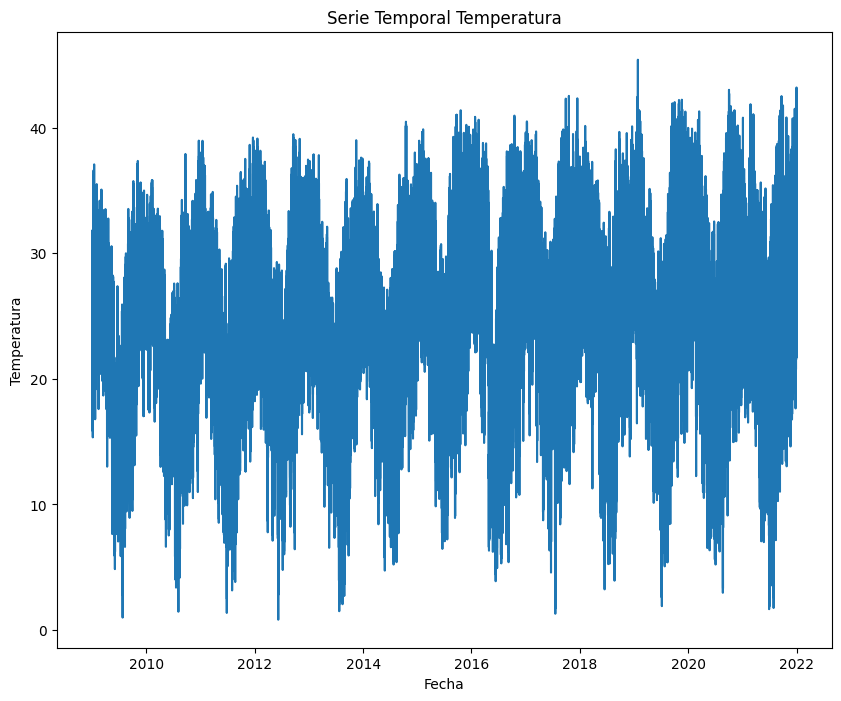

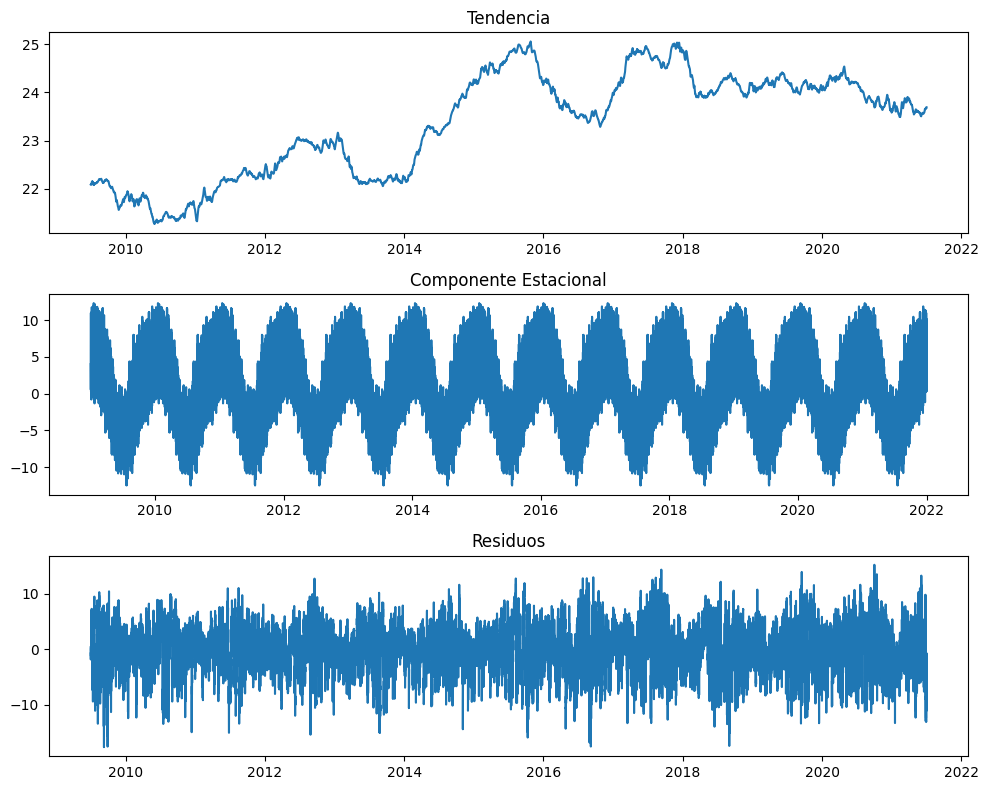

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(Data.index, Data['Temperatura'], label='Serie Temporal Original')
plt.title('Serie Temporal Temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
#plt.legend()
plt.show()
# Descomposición estacional
result = seasonal_decompose(Data['Temperatura'], model='additive', period=365*8)  # Asumiendo un período estacional de 365 días

# Visualizar los componentes de la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(result.trend)
plt.title('Tendencia')

plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
plt.title('Componente Estacional')

plt.subplot(3, 1, 3)
plt.plot(result.resid)
plt.title('Residuos')

plt.tight_layout()
plt.show()

Grafico de Humedad vs. Tiempo

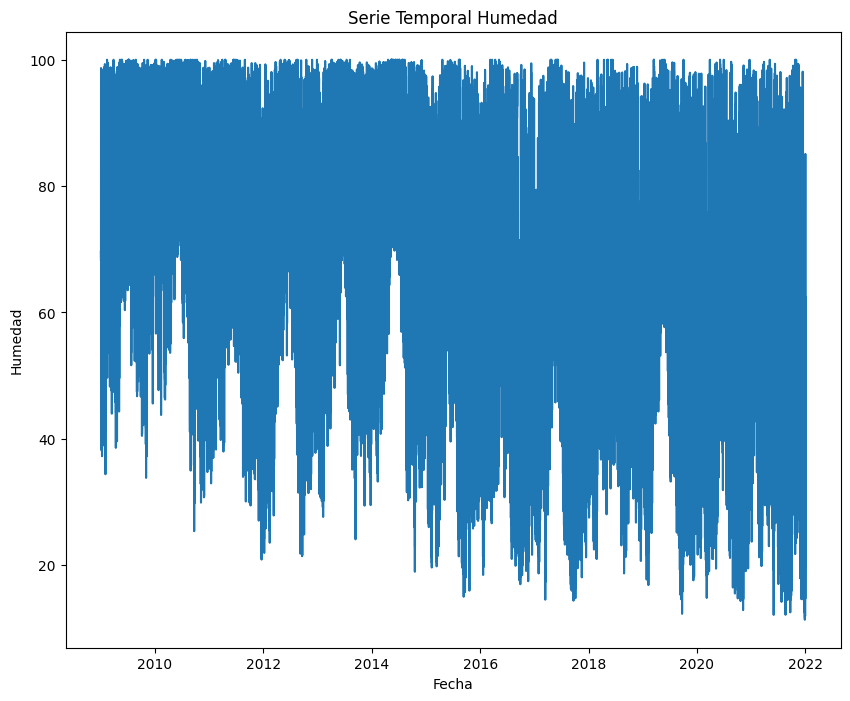

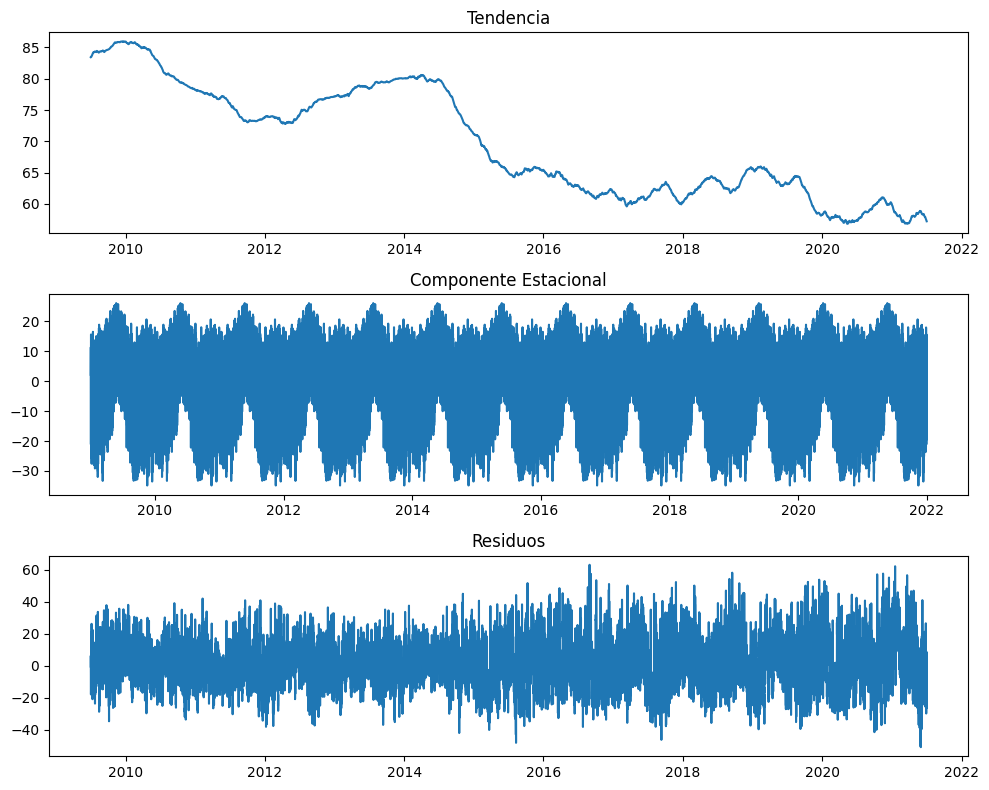

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(Data.index, Data['Humedad'], label='Serie Temporal Original')
plt.title('Serie Temporal Humedad')
plt.xlabel('Fecha')
plt.ylabel('Humedad')
#plt.legend()
plt.show()
# Descomposición estacional
result = seasonal_decompose(Data['Humedad'], model='additive', period=365*8)  # Asumiendo un período estacional de 365 días

# Visualizar los componentes de la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(result.trend)
plt.title('Tendencia')

plt.subplot(3, 1, 2)
plt.plot(result.seasonal)
plt.title('Componente Estacional')

plt.subplot(3, 1, 3)
plt.plot(result.resid)
plt.title('Residuos')

plt.tight_layout()
plt.show()

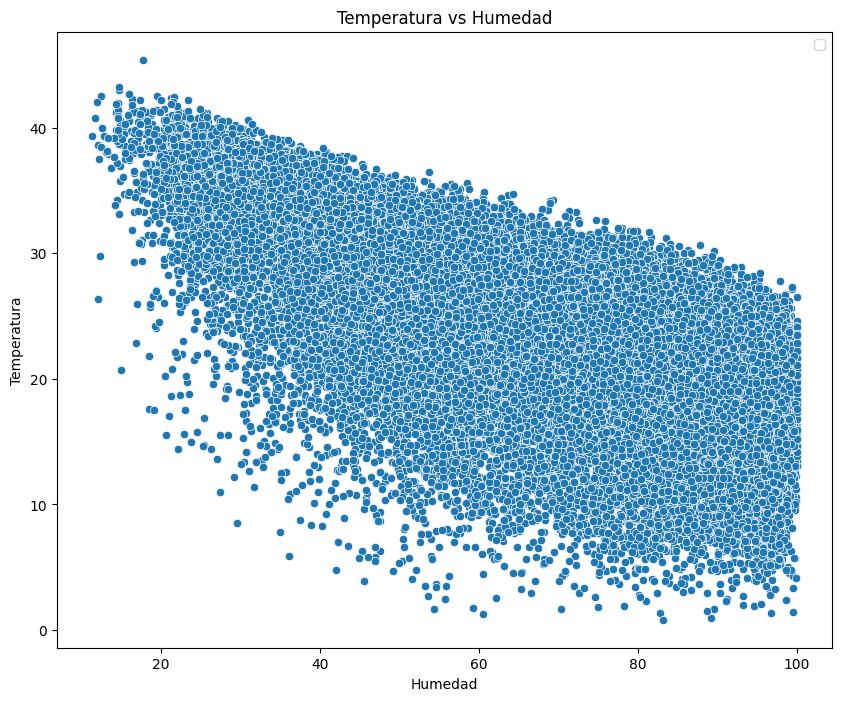

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Data, y=Data['Temperatura'], x=Data['Humedad'])
plt.title('Temperatura vs Humedad')
plt.xlabel('Humedad')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


Grafico Temporal de Temperatura y Humedad

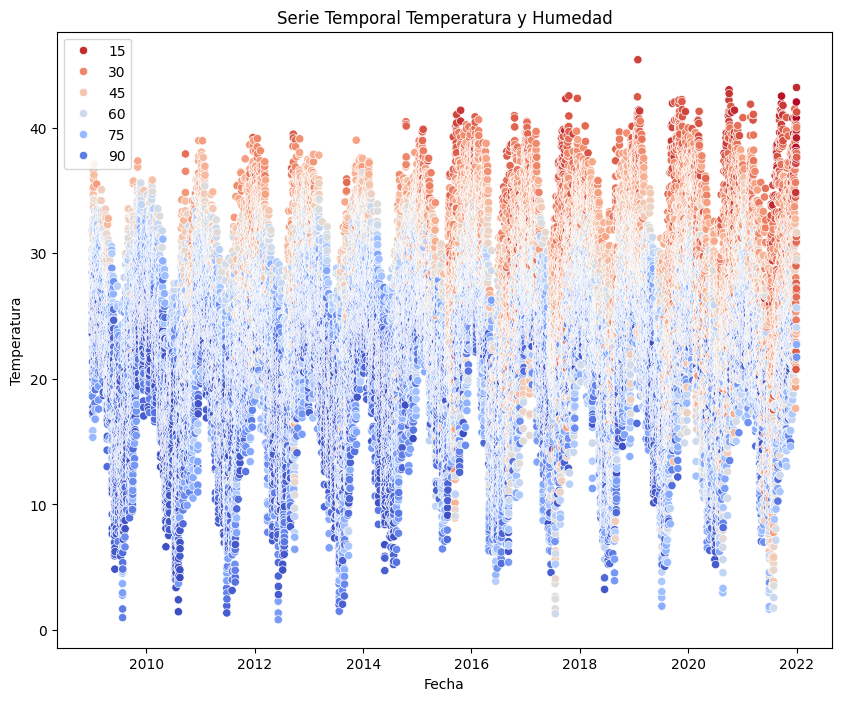

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=Data, y=Data['Temperatura'], x=Data.index,hue=Data['Humedad'],palette='coolwarm_r')
plt.title('Serie Temporal Temperatura y Humedad')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


Temperatura Promedio Dia, Semana, Mes

In [ ]:
TempPromDia=Data['Temperatura'].resample('D').mean()
TempPromSemana=Data['Temperatura'].resample('W').mean()
TempPromMes=Data['Temperatura'].resample('M').mean()

TempMaxDia=Data['Temperatura'].resample('D').max()
TempMaxSemana=Data['Temperatura'].resample('W').max()
TempMaxMes=Data['Temperatura'].resample('M').max()


Separacion del Dataset para entrenamiento

In [ ]:
TrainDia=TempPromDia.loc['2019-01-02':'2019-12-31']
TrainSemana=TempPromSemana.loc[:'2019-12-31']
TrainMes=TempPromMes.loc[:'2019-12-31']
TestDia=TempPromDia.loc['2020-01-01':]
TestSemana=TempPromSemana.loc['2020-01-01':]
TestMes=TempPromMes.loc['2020-01-01':]

PastWeek_Temp = TempPromSemana.shift(1).dropna()
#TrainDia=TempMaxDia.loc[:'2019-12-31']
#TrainSemana=TempMaxSemana.loc[:'2019-12-31']
#TrainMes=TempMaxMes.loc[:'2019-12-31']
#TestDia=TempMaxDia.loc['2020-01-01':]
#TestSemana=TempMaxSemana.loc['2020-01-01':]
#TestMes=TempMaxMes.loc['2020-01-01':]


indexDia=TrainDia.index
indexSemana=TrainSemana.index
indexMes=TrainMes.index

scaler=RobustScaler()
SDV=scaler.fit_transform(TrainDia.values.reshape(-1,1))
SSV=scaler.fit_transform(TrainSemana.values.reshape(-1,1))
SMV=scaler.fit_transform(TrainMes.values.reshape(-1,1))

STrainDia = pd.DataFrame(SDV, index=indexDia, columns=['TempScaled'])
STrainSemana = pd.DataFrame(SSV, index=indexSemana, columns=['TempScaled'])
STrainMes = pd.DataFrame(SMV, index=indexMes, columns=['TempScaled'])

#print(STrainDia)

Graficos ACF y PACF para determinar valores de p y q

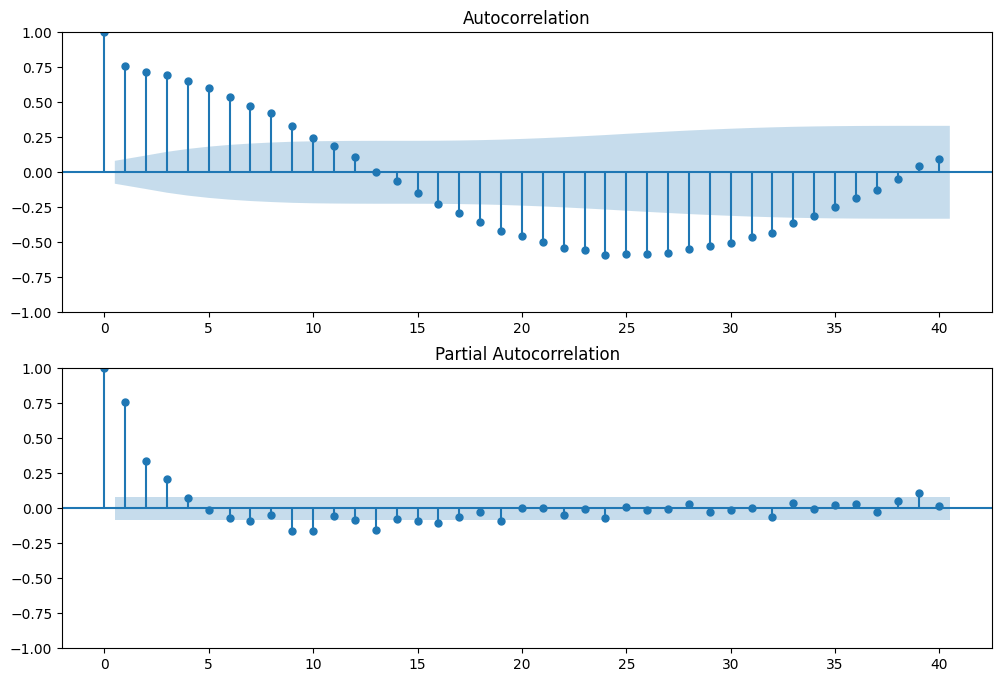

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(TrainSemana, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(TrainSemana, lags=40, ax=ax2)

plt.show()

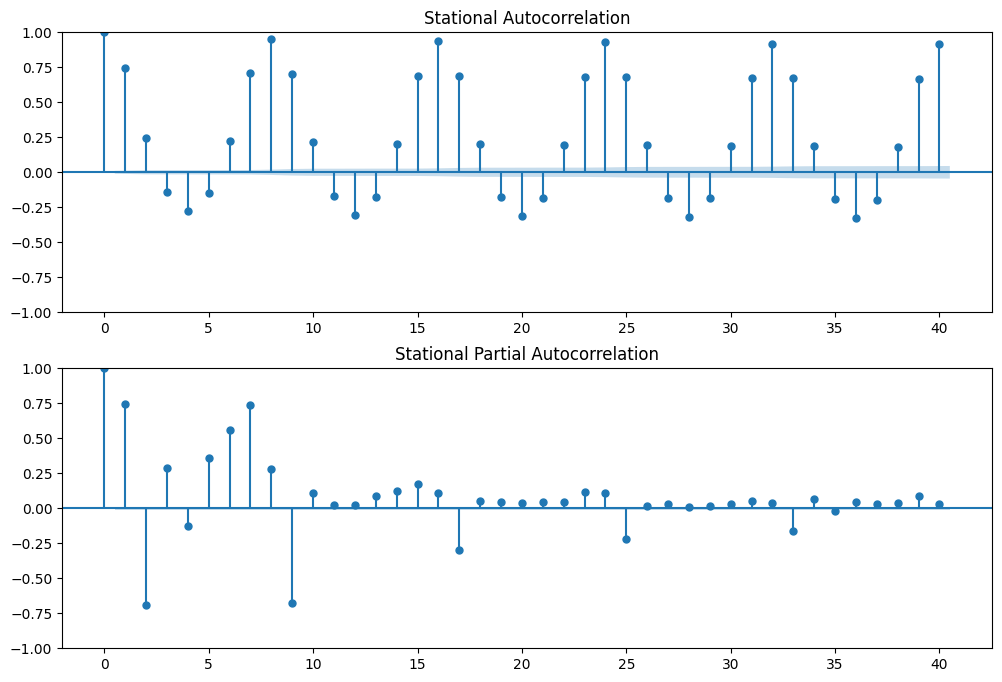

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(result.seasonal, lags=40, ax=ax1)
ax1.set_title('Stational Autocorrelation')
sm.graphics.tsa.plot_pacf(result.seasonal, lags=40, ax=ax2)

plt.title('Stational Partial Autocorrelation')
plt.show()

Modelo Sarimax Dia

Modelo Sarimax Semana

In [ ]:
SarimaxSemana = sm.tsa.SARIMAX(TrainSemana, order=(2, 0, 1), seasonal_order=(1,0,1,52))
fitSemana = SarimaxSemana.fit()
PredSemana = fitSemana.predict(start='2020-01-01', end='2021-12-31')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Modelo Sarimax Semana Scaled

In [ ]:
SarimaxSemanaScaled = sm.tsa.SARIMAX(STrainSemana, order=(2, 0, 1), seasonal_order=(1,0,1,52))
fitSemanaScaled = SarimaxSemanaScaled.fit()
PredSemanaScaled = fitSemanaScaled.predict(start='2020-01-01', end='2021-12-31')


In [ ]:
PSST= scaler.inverse_transform(PredSemanaScaled.values.reshape(-1,1))
PredSemanaScaledT = pd.DataFrame(PSST, index=TestSemana.index, columns=['TempScaled'])
#print(PredSemanaScaledT)

Prediccion Semanal Multivariado

In [ ]:
exog=Data['Humedad'].loc[:'2019-12-31'].resample('W').mean().iloc[:-1]
fhumidity=Data['Humedad'].loc['2020-01-01':].resample('W').mean()
exog2=PastWeek_Temp.loc[:'2019-12-31'].iloc[:-1]
fPast_Temp=PastWeek_Temp.loc['2020-01-01':]


In [ ]:
print(TrainSemana.iloc[1:573],exog2)

Fecha
2009-01-11    26.200407
2009-01-18    27.184668
2009-01-25    24.355408
2009-02-01    26.687587
2009-02-08    27.944488
                ...    
2019-11-24    30.734876
2019-12-01    27.922084
2019-12-08    24.869558
2019-12-15    29.575508
2019-12-22    25.329260
Freq: W-SUN, Name: Temperatura, Length: 572, dtype: float64 Fecha
2009-01-11    23.860944
2009-01-18    26.200407
2009-01-25    27.184668
2009-02-01    24.355408
2009-02-08    26.687587
                ...    
2019-11-24    26.299266
2019-12-01    30.734876
2019-12-08    27.922084
2019-12-15    24.869558
2019-12-22    29.575508
Freq: W-SUN, Name: Temperatura, Length: 572, dtype: float64


In [ ]:
SarimaxSemana = sm.tsa.SARIMAX(TrainSemana,exog=exog, order=(2, 0, 2), seasonal_order=(1,0,1,52))
fitSemana = SarimaxSemana.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
SarimaxSemana2 = sm.tsa.SARIMAX(TrainSemana.iloc[1:573],exog=exog2, order=(2, 0, 2), seasonal_order=(1,0,1,52))
fitSemana2 = SarimaxSemana2.fit()

Sarimax Multivariado Normalizado

In [ ]:
SarimaxSemanaScaled = sm.tsa.SARIMAX(STrainSemana,exog=exog, order=(2, 0, 1), seasonal_order=(1,0,1,52))
fitSemanaScaled = SarimaxSemanaScaled.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = fitSemana.forecast(steps=105, exog=fhumidity)


In [ ]:
forecast2=fitSemana2.forecast(steps=105, exog=fPast_Temp)

In [ ]:
forecastscaled=fitSemanaScaled.forecast(steps=105,exog=fhumidity)

In [ ]:
PSSMT= scaler.inverse_transform(forecastscaled.values.reshape(-1,1))
PredSemanaScaledMT = pd.DataFrame(PSSMT, index=TestSemana.index, columns=['TempScaled'])

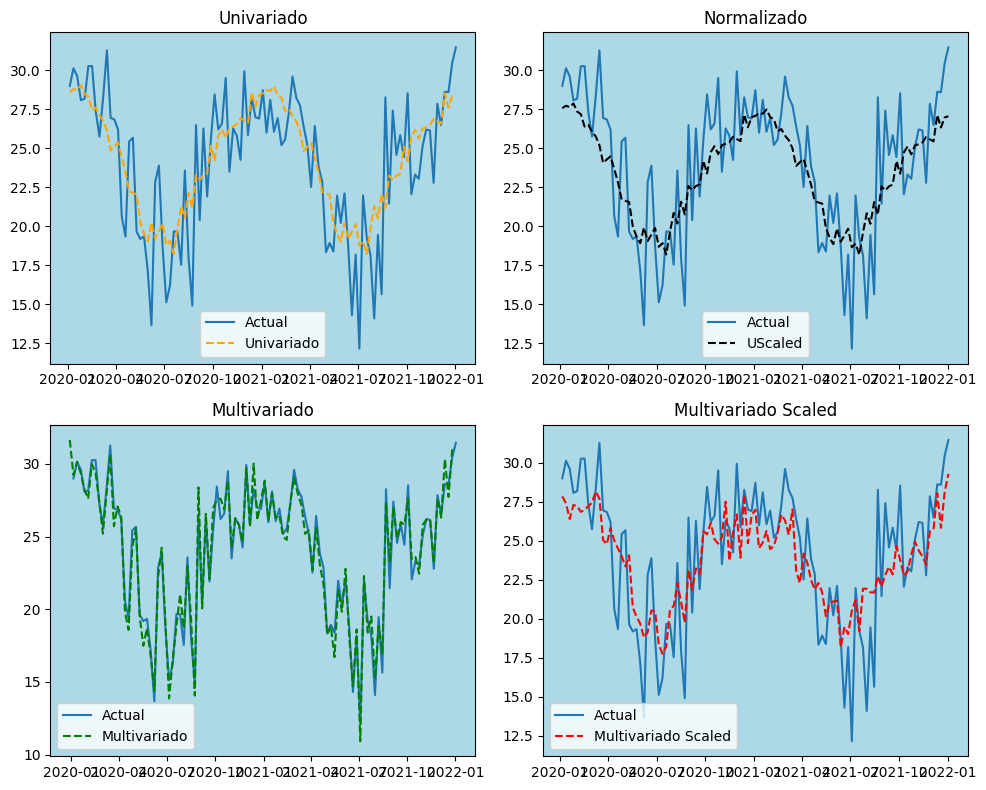

In [ ]:

plt.figure(figsize=(10, 8))



plt.subplot(221)
plt.plot(TestSemana, label='Actual')
plt.plot(PredSemana, color='orange', linestyle='--', label='Univariado')
plt.title('Univariado')
plt.legend()
plt.gca().set_facecolor('lightblue')

plt.subplot(222)
plt.plot(TestSemana, label='Actual')
plt.plot(PredSemanaScaledT, color='black', linestyle='--', label='UScaled')
plt.title('Normalizado')
plt.legend()
plt.gca().set_facecolor('lightblue')

plt.subplot(223)
plt.plot(TestSemana, label='Actual')
plt.plot(forecast2, color='green', linestyle='--', label='Multivariado')
plt.title('Multivariado')
plt.legend()
plt.gca().set_facecolor('lightblue')

plt.subplot(224)
plt.plot(TestSemana, label='Actual')
plt.plot(PredSemanaScaledMT, color='red', linestyle='--', label='Multivariado Scaled')
plt.title('Multivariado Scaled')
plt.legend()
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()

In [ ]:
r2Semana=r2_score(TestSemana,PredSemana)
rmseSemana=mean_squared_error(TestSemana,PredSemana,squared=False)
r2SemanaS=r2_score(TestSemana,PredSemanaScaledT)
rmseSemanaS=mean_squared_error(TestSemana,PredSemanaScaledT,squared=False)
r2SemanaM=r2_score(TestSemana,forecast)
rmseSemanaM=mean_squared_error(TestSemana,forecast,squared=False)
r2SemanaM2=r2_score(TestSemana,forecast2)
rmseSemanaM2=mean_squared_error(TestSemana,forecast2,squared=False)
r2SemanaMS=r2_score(TestSemana,PredSemanaScaledMT)
rmseSemanaMS=mean_squared_error(TestSemana,PredSemanaScaledMT,squared=False)

print(r2Semana, rmseSemana)
print(r2SemanaS,rmseSemanaS )
print(r2SemanaM,rmseSemanaM)
print(r2SemanaM2,rmseSemanaM2)
print(r2SemanaMS,rmseSemanaMS)

0.614296250127776 2.8144052311029495
0.5862991698071993 2.9147606308684986
0.6690747401260615 2.6069017165936588
0.3187307283984707 3.7404090498591214
0.633786120999104 2.74237662484415


In [ ]:
CategoryTrue=pd.cut(TestSemana, bins=[-float('inf'), cold_threshold, good_threshold, hot_threshold, float('inf')],
                                      labels=['Cold', 'Good', 'Hot', 'Very Hot'])
print(CategoryTrue)


Fecha
2020-01-05    Good
2020-01-12    Good
2020-01-19    Good
2020-01-26    Good
2020-02-02    Good
              ... 
2021-12-05    Good
2021-12-12    Good
2021-12-19    Good
2021-12-26     Hot
2022-01-02     Hot
Freq: W-SUN, Name: Temperatura, Length: 105, dtype: category
Categories (4, object): ['Cold' < 'Good' < 'Hot' < 'Very Hot']


In [ ]:
CategoryPred=pd.cut(forecast, bins=[-float('inf'), cold_threshold, good_threshold, hot_threshold, float('inf')],
                                      labels=['Cold', 'Good', 'Hot', 'Very Hot'])
print(CategoryPred)

2020-01-05    Good
2020-01-12    Good
2020-01-19    Good
2020-01-26    Good
2020-02-02    Good
              ... 
2021-12-05    Good
2021-12-12    Good
2021-12-19    Good
2021-12-26    Good
2022-01-02     Hot
Freq: W-SUN, Name: predicted_mean, Length: 105, dtype: category
Categories (4, object): ['Cold' < 'Good' < 'Hot' < 'Very Hot']


In [ ]:
print(classification_report(CategoryTrue,CategoryPred))

              precision    recall  f1-score   support

        Cold       0.73      0.88      0.80        51
        Good       0.81      0.67      0.73        51
         Hot       1.00      0.33      0.50         3

    accuracy                           0.76       105
   macro avg       0.85      0.63      0.68       105
weighted avg       0.77      0.76      0.76       105



<ipython-input-21-6f01aa826245>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Category, y=valuesr2,palette='Set2',ax=ax, orient='v')


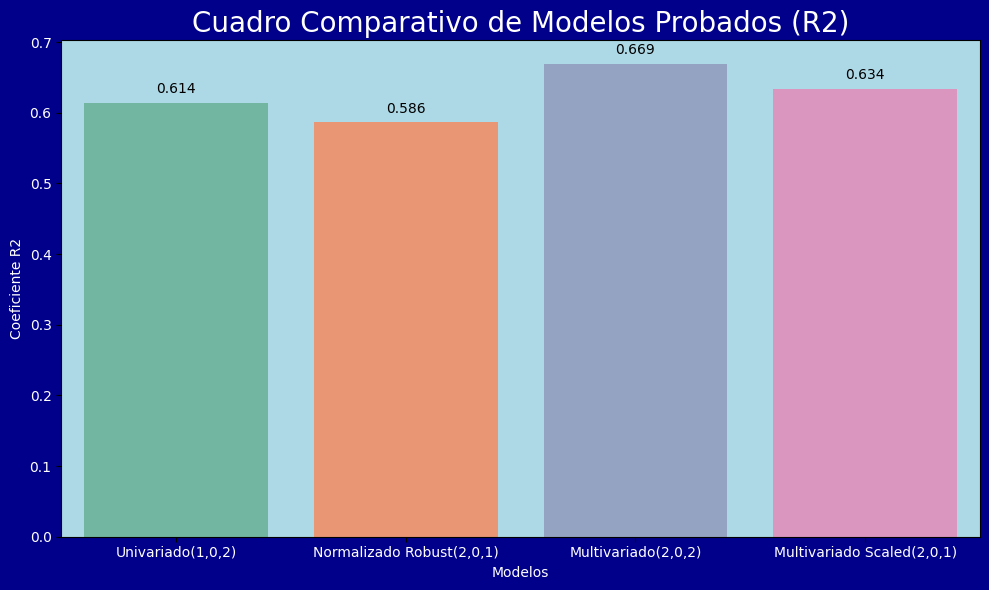

In [ ]:
Category=['Univariado(1,0,2)','Normalizado Robust(2,0,1)','Multivariado(2,0,2)','Multivariado Scaled(2,0,1)']

valuesr2=[r2Semana,r2SemanaS,r2SemanaM,r2SemanaMS]
valuesrmse=[rmseSemana,rmseSemanaS,rmseSemanaM,rmseSemanaMS]


fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=Category, y=valuesr2,palette='Set2',ax=ax, orient='v')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Modelos', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.ylabel('Coeficiente R2', color='white')
plt.title('Cuadro Comparativo de Modelos Probados (R2)',fontsize=20, color='white')
fig.patch.set_facecolor('darkblue')
plt.gca().set_facecolor('lightblue')

plt.tight_layout()
plt.show()


<ipython-input-22-05f71538bb8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Category, y=valuesrmse,palette='Set2',ax=ax, orient='v')


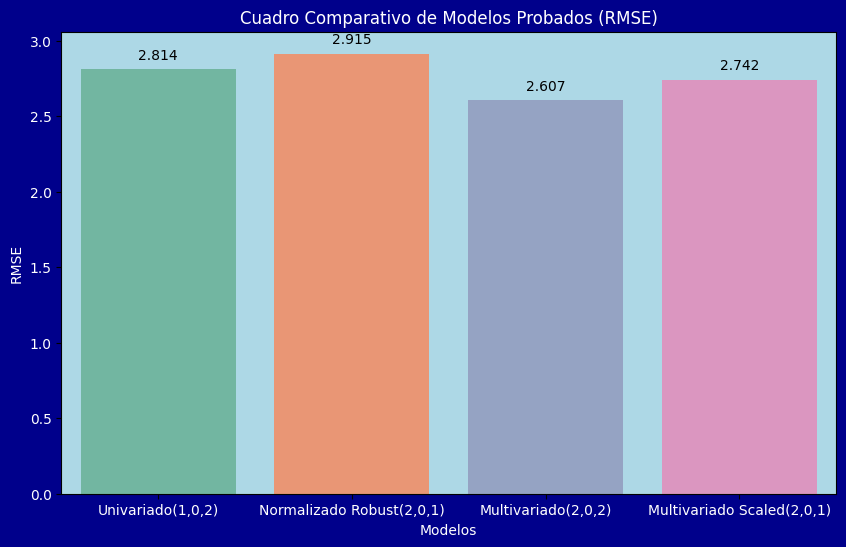

In [ ]:

fig, ax = plt.subplots(figsize=(10,6))


sns.barplot(x=Category, y=valuesrmse,palette='Set2',ax=ax, orient='v')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Modelos', color='white')
plt.ylabel('RMSE', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.title('Cuadro Comparativo de Modelos Probados (RMSE)', color='white')
fig.patch.set_facecolor('darkblue')
plt.gca().set_facecolor('lightblue')


plt.show()
